<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning/blob/master/Python/chap11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第11章 モデル推定

## 例題11.3

scikit-learn付属のirisデータからsepallength（0次元目）とsepalwidth（1次元目）特徴を抜き出して2次元教師なしデータを作成し、クラスタリングを行います。

ライブラリの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.mixture import GaussianMixture

(1)データの読み込み、(2)0次元目と1次元目の抜き出し を行います。

In [2]:
iris = load_iris()
X = iris.data[:,0:2]

クラスタリング結果のプロットを関数にしておきます。

In [3]:
def result_plot(X, y):
  '''
  Xは2次元に限定、yは各データのクラスタ番号
  '''
  for t in set(y):
    plt.scatter(X[y==t,0], X[y==t,1])
  plt.legend(set(y))

正解をプロットします。もちろんデータをまとめる処理のみではこの結果を得ることはできません。

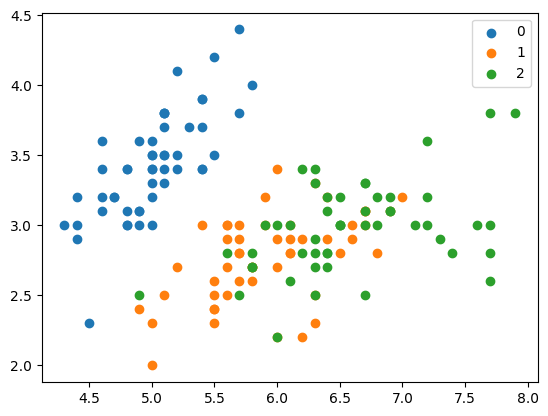

In [4]:
result_plot(X, iris.target)

### 階層的クラスタリング

[AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)を用いて階層的クラスタリングを行います。クラスタ数が3になったところで処理を止めます。

In [5]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

散布図をプロットして結果を確認します。

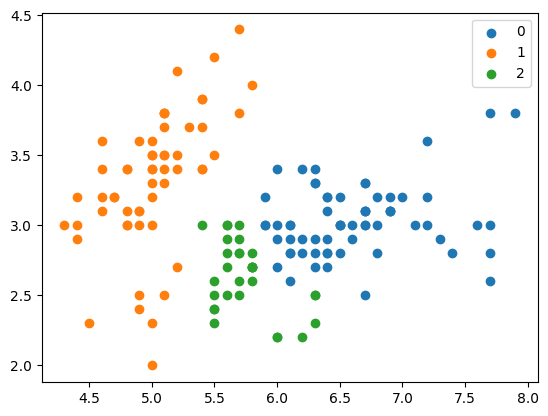

In [6]:
result_plot(X, ac.labels_)

類似度はAgglomerativeClusteringの引数linkageで指定します。可能な値は'ward', 'complete', 'average', 'single' で、デフォルトは 'ward' です。

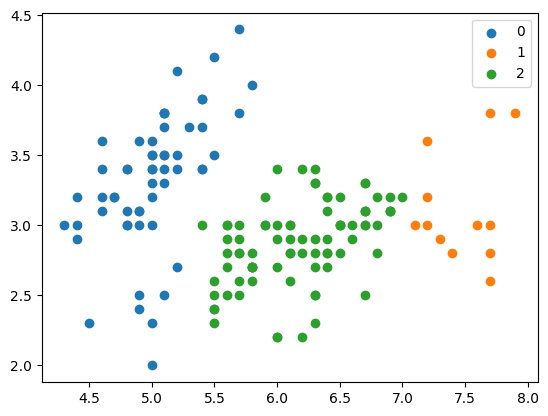

In [7]:
ac = AgglomerativeClustering(linkage='average', n_clusters=3)
ac.fit(X)
result_plot(X, ac.labels_)

### k-meansクラスタリング

[KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)を用いて分割最適化クラスタリングを行います。クラスタ数3は予め与えておく必要があります。

In [8]:
km = KMeans(n_clusters = 3)
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

散布図をプロットして結果を確認します。

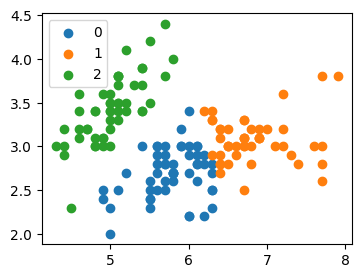

In [9]:
plt.figure(figsize=(4,3))
result_plot(X, km.labels_)

## 例題11.5

### クラスタ数決定の自動化 Affinity Propagation

 [AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)はすべてのノード間で「類似度」と「クラスタ中心になりやすさ」の情報を交換しながらクラスタリングを行う手法です。クラスタ数（すなわちクラスタ中心の数）を事前に決める必要はありません。

In [10]:
ap=AffinityPropagation()
ap.fit(X)

AffinityPropagation()

apインスタンスのcluster_centers\_属性の値は、クラスタ中心となるデータ番号のリストです。


In [11]:
ap.cluster_centers_indices_

array([  2,  17,  33,  51,  57,  87,  94,  97, 117, 130, 141])

散布図をプロットして結果を確認します。

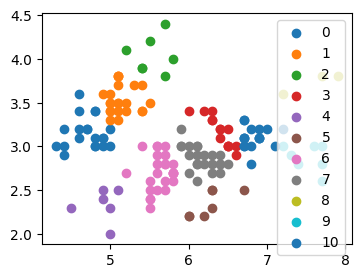

In [12]:
plt.figure(figsize=(4,3))
result_plot(X, ap.labels_)

パラメータpreferenceは各データの中心としての選ばれやすさを表すので、負の値を設定すれば、その絶対値に応じてクラスタ数が少なくなります。

In [13]:
ap2 = AffinityPropagation(preference=-18)
ap2.fit(X)

AffinityPropagation(preference=-18)

In [14]:
ap2.cluster_centers_indices_

array([ 49,  73, 125])

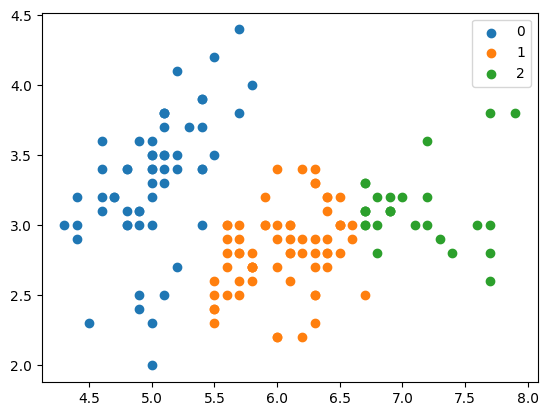

In [15]:
result_plot(X, ap2.labels_)

## 例題11.8

### 確率密度推定

[GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)では、EMアルゴリズムを用いて混合分布によるクラスタリングを行います。クラスタ数は3としておきます。

In [16]:
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

GaussianMixture(n_components=3)

各正規分布のパラメータは、gmmインスタンスのmeans\_属性とcovariances\_属性にリスト形式で格納されています。

In [17]:
print('means')
print(gmm.means_)
print('covariances:')
print(gmm.covariances_)

means
[[5.01509042 3.45136929]
 [6.69135935 3.03010885]
 [5.90637066 2.74742043]]
covariances:
[[[0.11944295 0.08835036]
  [0.08835036 0.11895089]]

 [[0.35953784 0.05092452]
  [0.05092452 0.08961421]]

 [[0.2771913  0.0894219 ]
  [0.0894219  0.09420707]]]


結果の表示は[サンプルコード](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py)を参考にしてください。

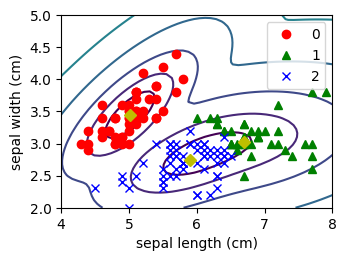

In [18]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(3.5,2.5))
xa = np.linspace(4, 8)
ya = np.linspace(2, 5)
Xa, Ya = np.meshgrid(xa, ya)
XX = np.array([Xa.ravel(), Ya.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(Xa.shape)
plt.contour(Xa, Ya, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
co = ['rgbcy'[i%5]+'o^xs'[i%4] for i in range(20)]

y = gmm.predict(X)
for t, c in zip(set(y),co):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(3))

plt.plot(gmm.means_[:,0], gmm.means_[:,1], 'yD')
#plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

# 異常検知

irisデータの一部を異常値に変更し、LOFで検出

In [19]:
from sklearn.datasets import load_iris
X, _ = load_iris(return_X_y=True, as_frame=True)
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


X[0]のpetalwidthについて、最大値から1標準偏差程度離れた値に変更します

In [20]:
X['petal width (cm)'][0] = 2.5 + 0.76
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,3.26
1,4.9,3.0,1.4,0.20
2,4.7,3.2,1.3,0.20
3,4.6,3.1,1.5,0.20
4,5.0,3.6,1.4,0.20
...,...,...,...,...
145,6.7,3.0,5.2,2.30
146,6.3,2.5,5.0,1.90
147,6.5,3.0,5.2,2.00
148,6.2,3.4,5.4,2.30


[Local Outlier Factor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html) (LOF) を求めます

In [21]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
lof.fit(X)
X['lof'] = lof.negative_outlier_factor_

array([[<Axes: title={'center': 'lof'}>]], dtype=object)

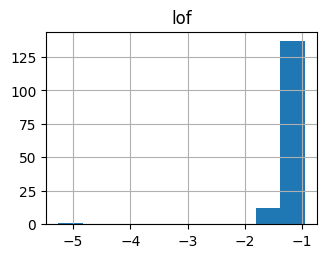

In [22]:
X.hist(column='lof', figsize=(3.5,2.5))

## 練習問題

scikit-learnのdiabetesデータに対して様々なクラスタリング手法を適用してみてください。diabetesデータは回帰用のデータ（事例数442）で、target値は 25-346 で値が高くなるほど悪化の可能性が高いことを示しています。生成したクラスタ間で、target値の平均に違いが生じているかどうかで評価を行ってください。他のクラスタと比較してtarget値の平均が突出して高くなるようなクラスタ（一定数以上の要素数をもつことが条件）を見つけることができれば成功です。

### 解答例


ライブラリの読み込み

In [23]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.mixture import GaussianMixture

データの読み込み

In [24]:
ds = load_diabetes(as_frame=True)
X = ds.data
t = ds.target
print(ds.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [25]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
df = pd.DataFrame(data=X2,columns=['x','y'])
df2 = pd.concat([df, t], axis=1)

主成分分析を用いてデータをプロットします。点の色の濃さがtargetの値の大きさを表すようにします。色の濃い部分と薄い部分についてある程度傾向が見えるので、試してみる可能性はありそうです。

使用したライブラリ [altair](https://altair-viz.github.io/index.html)

In [26]:
alt.Chart(df2).mark_circle(size=60).encode(
    x='x',
    y='y',
    color='target'
).interactive()

alt.Chart(...)

ターゲット値の統計値

In [27]:
print(f'ave: {np.average(t):.1f}   std: {np.std(t):.1f}')

ave: 152.1   std: 77.0


### 階層的クラスタリング

[AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)を用いて階層的クラスタリングを行います。クラスタ数を変化させて結果を観察してください。

In [28]:
ac=AgglomerativeClustering(n_clusters=5)
ac.fit(X)

AgglomerativeClustering(n_clusters=5)

クラスタ毎の事例数とtarget値の平均を表示します。

In [29]:
def show_results(y, target):
  for c in set(y):
    num = np.count_nonzero(y==c)
    ave = np.average(target[y==c])
    print(f'Cluster {c}: num {num:3}, ave {ave:.1f}')

In [30]:
show_results(ac.labels_, t)

Cluster 0: num 118, ave 170.2
Cluster 1: num  84, ave 173.4
Cluster 2: num  98, ave 102.0
Cluster 3: num  83, ave 196.8
Cluster 4: num  59, ave 106.3


### k-meansクラスタリング

[KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)を用いて分割最適化クラスタリングを行います。クラスタ数は予め与えておく必要があります。

In [31]:
km = KMeans(n_clusters = 3)
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

クラスタ毎の事例数とtarget値の平均を表示します。

In [32]:
show_results(km.labels_, t)

Cluster 0: num 125, ave 197.4
Cluster 1: num 158, ave 108.0
Cluster 2: num 159, ave 160.4


 [AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)はすべてのノード間で「類似度」と「クラスタ中心になりやすさ」の情報を交換しながらクラスタリングを行う手法です。クラスタ数（すなわちクラスタ中心の数）を事前に決める必要はありません。

 パラメータpreferenceは各データの中心としての選ばれやすさを表すので、負の値を設定すれば、その絶対値に応じてクラスタ数が少なくなります。

In [33]:
ap=AffinityPropagation(preference=-0.3)
ap.fit(X)

AffinityPropagation(preference=-0.3)

クラスタ毎の事例数とtarget値の平均を表示します。

In [34]:
show_results(ap.labels_, t)

Cluster 0: num  85, ave 194.0
Cluster 1: num  67, ave 182.1
Cluster 2: num  62, ave 109.2
Cluster 3: num  70, ave 105.9
Cluster 4: num  89, ave 119.0
Cluster 5: num  69, ave 199.7


### 確率密度推定

[GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)では、EMアルゴリズムを用いて混合分布によるクラスタリングを行います。クラスタ数を指定する必要があります。これまでのクラスと少しメソッドが異なるので注意してください。

In [35]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=1)
gmm.fit(X)

GaussianMixture(n_components=3, random_state=1)

クラスタ毎の事例数とtarget値の平均を表示します。

In [36]:
show_results(gmm.predict(X), t)

Cluster 0: num 224, ave 111.2
Cluster 1: num 173, ave 185.8
Cluster 2: num  45, ave 226.6


## まとめ

初期値に乱数を用いるアルゴリズムは、実施毎に結果が異なります。GMMの例ではrandom_state=1で、事例数45、平均値226.6のクラスタが発見できていますが、他の値ではかなり異なる結果になります。